In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math

In [10]:
donnee = pd.read_csv('./Fichiers/Poissonsv0r2.csv')
donnee=donnee.dropna()
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

X=donnee.drop({'Espèces','Poids (g)'}, 1)
Y=donnee['Poids (g)']
Yclass=donnee['Espèces']

/tmp/ipykernel_181094/1687494023.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=donnee.drop({'Espèces','Poids (g)'}, 1)


In [4]:
"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Poids (g)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.95e-70
Time:                        16:45:12   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Longueur 1 (cm)    62.3552     40.209      1.551      0.123     -17.081     141.791
Longueur 2 (cm)    -6.5268     41.759     -0.156      0.876     -89.025      75.971
Longueur 3 (cm)   -29.0262     17.353     -1.673      0.096     -63.309       5.256
Hauteur (cm)       28.2974      8.729      3.242      0.001      11.052      45.543
Épaisseur (cm)     22.4733     20.372      1.103      0.272     -17.773      62.720
const            -499.5870     29.572    -16.894      0.000    -558.010    -441.164
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

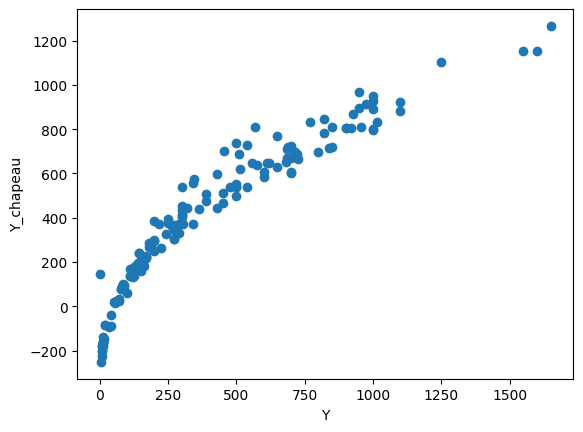

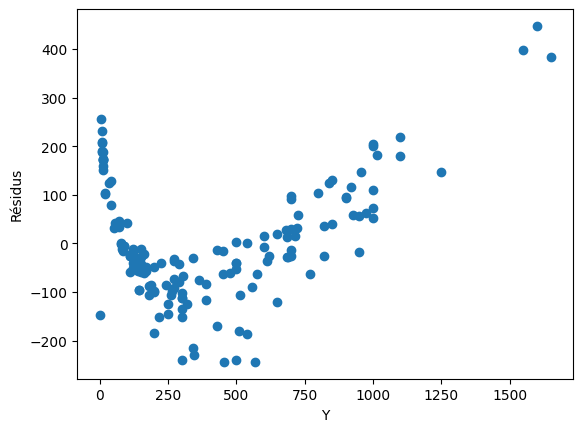

In [11]:
plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()

Epsilon=Y.values.reshape(-1,1)-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Y.values, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()

Text(0.5, 0, 'Poids (g) Transformé Box-Cox')

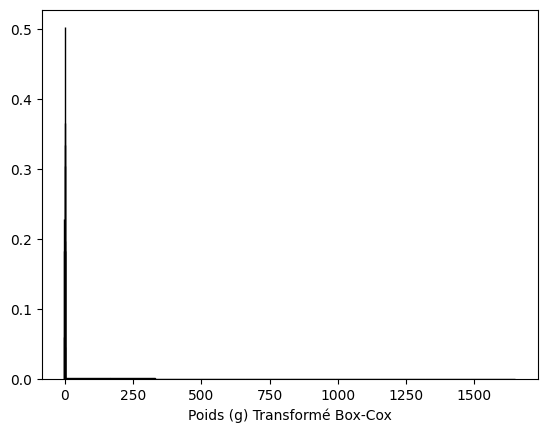

In [12]:
"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"Transformation Box-Cox"

ax=plt.hist(Y,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Poids (g)")

### Box-cox: estritamente MAIOR q 0
X_BC=X[(Y != 0)]
Y_BC=Y[(Y != 0)]

from sklearn.preprocessing import PowerTransformer

### Transformacao box-cox (só valores positivos)
ptY_BC = PowerTransformer(method='box-cox')
ptY_BC.fit(Y_BC.values.reshape(-1,1))
lambdasY=ptY_BC.lambdas_
Ytransf_BC=ptY_BC.transform(Y_BC.values.reshape(-1,1))

ax=plt.hist(Ytransf_BC,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Poids (g) Transformé Box-Cox")

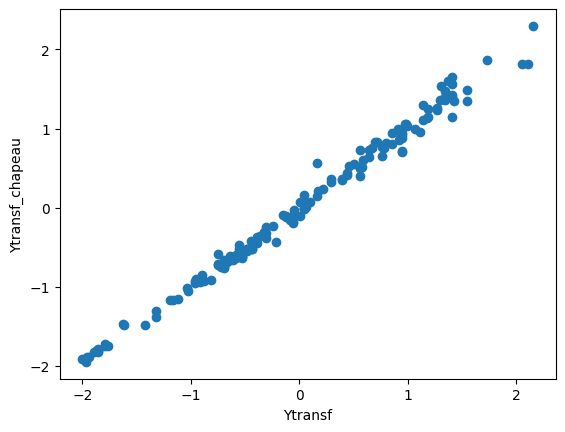

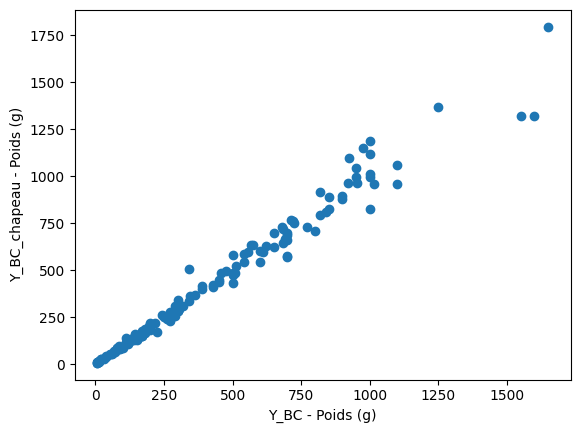

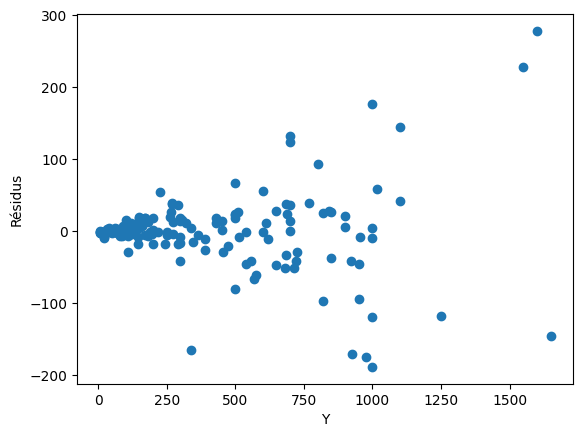

((array([-2.62148361, -2.30354173, -2.12152751, -1.99076719, -1.8871843 ,
         -1.80060859, -1.72574306, -1.65946215, -1.59976037, -1.54527067,
         -1.49501756, -1.44827945, -1.40450687, -1.36327131, -1.3242318 ,
         -1.28711237, -1.25168634, -1.21776515, -1.18519012, -1.15382642,
         -1.12355845, -1.09428627, -1.0659229 , -1.03839209, -1.01162664,
         -0.98556696, -0.96015997, -0.93535814, -0.91111873, -0.88740318,
         -0.86417653, -0.84140698, -0.81906553, -0.79712561, -0.77556286,
         -0.75435483, -0.73348079, -0.71292156, -0.69265936, -0.67267763,
         -0.65296095, -0.6334949 , -0.61426601, -0.59526161, -0.57646982,
         -0.55787943, -0.53947988, -0.5212612 , -0.50321392, -0.48532908,
         -0.46759815, -0.45001304, -0.432566  , -0.41524966, -0.39805696,
         -0.38098113, -0.36401567, -0.34715436, -0.33039117, -0.31372032,
         -0.29713621, -0.28063343, -0.26420673, -0.24785102, -0.23156135,
         -0.2153329 , -0.19916096, -0.

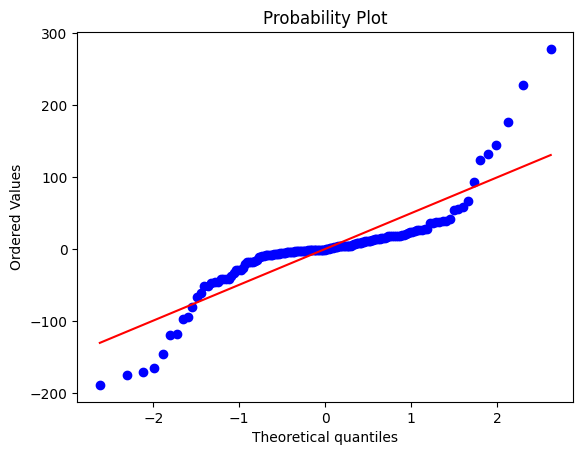

In [13]:
ptX_BC = PowerTransformer(method='box-cox')
ptX_BC.fit(X_BC.values)
lambdasX=ptX_BC.lambdas_
Xtransf_BC=ptX_BC.transform(X_BC.values)


modele=sm.OLS(Ytransf_BC,X_BC.assign(const=1))
resultats=modele.fit()
Ytransf_chap = resultats.predict(X_BC.assign(const=1))
resultats.summary()
plt.scatter(Ytransf_BC, Ytransf_chap)
plt.xlabel("Ytransf")
plt.ylabel("Ytransf_chapeau")
plt.show()

Y_BC_chapeau = ptY_BC.inverse_transform(Ytransf_chap.values.reshape(-1,1))
plt.scatter(Y_BC, Y_BC_chapeau)
plt.xlabel("Y_BC - Poids (g)")
plt.ylabel("Y_BC_chapeau - Poids (g)")
plt.show()

Epsilon=Y_BC.values.reshape(-1,1)-Y_BC_chapeau.reshape(-1,1)
plt.figure(1)
plt.plot(Y_BC.values, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()

sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))

In [14]:
"Standardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
scalerY = StandardScaler() 
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["Poids (kg)"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Poids (kg)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.95e-70
Time:                        16:49:21   Log-Likelihood:                -53.468
No. Observations:                 159   AIC:                             118.9
Df Residuals:                     153   BIC:                             137.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Longueur 1 (cm)     1.7413      1.123      1.551      0.123      -0.477       3.959
Longueur 2 (cm)    -0.1954      1.250     -0.156      0.876      -2.665       2.274
Longueur 3 (cm)    -0.9414      0.563     -1.673      0.096      -2.053       0.170
Hauteur (cm)        0.3388      0.105      3.242      0.001       0.132       0.545
Épaisseur (cm)      0.1058      0.096      1.103      0.272      -0.084       0.295
const            1.457e-16      0.027   5.32e-15      1.000      -0.054       0.054
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
"Pré-traitement"

donnee = pd.read_csv('./Fichiers/DonneesMarketingv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

donnee=donnee.dropna()

Variable=donnee["Achats web"]
var_nom="Achats web"
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.set_ylabel("Fonction de densité f(x)")

"Vérifier si les données sont normales"
sts.probplot(Variable.values, dist=sts.norm, plot=plt.figure().add_subplot(111))

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
mu, sigma = sts.norm.fit(Variable.values)
param=sts.norm.fit(Variable.values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


sts.probplot(Variable.values, dist=sts.norm(mu, sigma), plot=plt.figure().add_subplot(111))
Fit_normal = sts.kstest(Variable,'norm',param)

FileNotFoundError: [Errno 2] No such file or directory: '../Fichiers/DonneesMarketingv0r2.csv'